# Fourier transformations of audio signals

The Fourier transformation is a method of transforming between the frequency and time domains.

$$ f(t) \leftrightarrow F(\omega) $$

such that

$$ F(\omega) = \mathcal{F}(f(t))= \int_{-\infty}^{\infty} \mathcal{f}(t) \exp(-i\omega t) dt$$

This is a fundamental method for signal decomposition and its descrete implementation is important for practical signal processing and can be found in many other applications.

The purpose of this project is to gain experience with the use of the Fourier transform 

1. Apply the Fourier transform on a number of .wav sound files for examination of the component frequencies
1. Filter out some component frequencies to examine results

Further goals may be to

1. Implement the Fourier transform to work with a input stream from a audio recording device using the [`Soundevice`](https://python-sounddevice.readthedocs.io/en/0.5.1/) python library 

In [1]:
import os
import audio_fft
import seaborn
import matplotlib.pyplot as plt

seaborn.set_style("whitegrid")
%matplotlib inline

We can perform a discrete fourier transform on this sound signal. This can be done using the [`numpy.fft`](https://numpy.org/doc/stable/reference/routines.fft.html#module-numpy.fft) module. Because this is a real valued signal, we have used an implementation of the `rfft` method.

We will also only use a single audio channel.

It can be seen that there is a lot of dead space of frequencies with very low intensity left over in the plot. This can be sliced of

The reverse process may be performed using the `irfft` method

It can be seen that this recreates the signal of the 0th channel of the original sound file.

Performing the inverse fourier transform on the trimmed signal yields

It can be seen that this has a similar shape to the untrimmed array, but with a greater magnitude, and fewer samples.

total time 55.67952380952381s


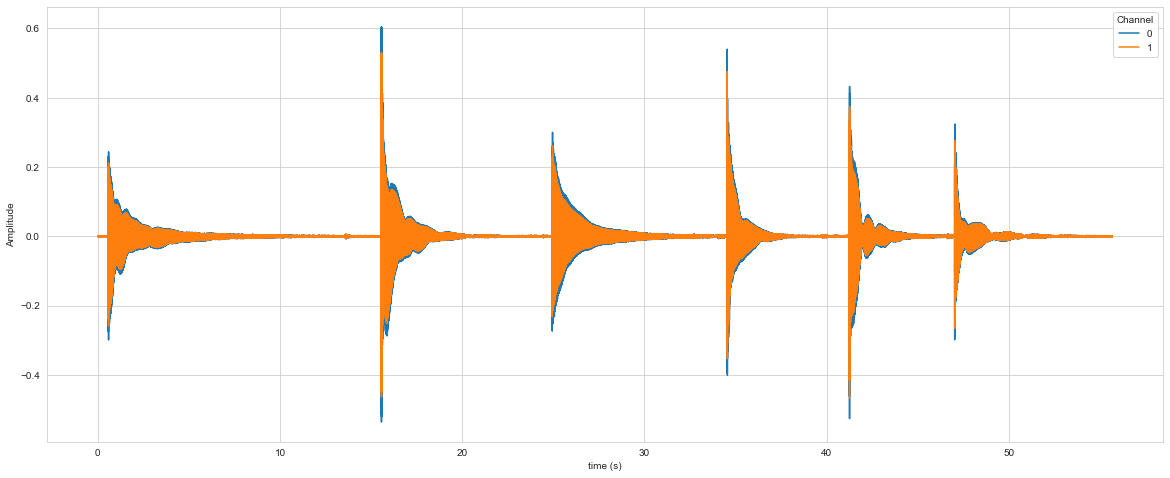

In [9]:
a_fft = audio_fft.AudioFFT()
a_fft.set_file(os.path.abspath(r"assets\123033__cgeffex__guitar_strings_take1.wav"))

fig, ax = plt.subplots(figsize=(20,8))
a_fft.signal_plot(a_fft.get_data(), ax)
plt.show()

We can slice the data to look at a subset, and trim portions of the data where there is little signal intensity.
Looking between 0 and 10 seconds

total time 4.777709750566894s


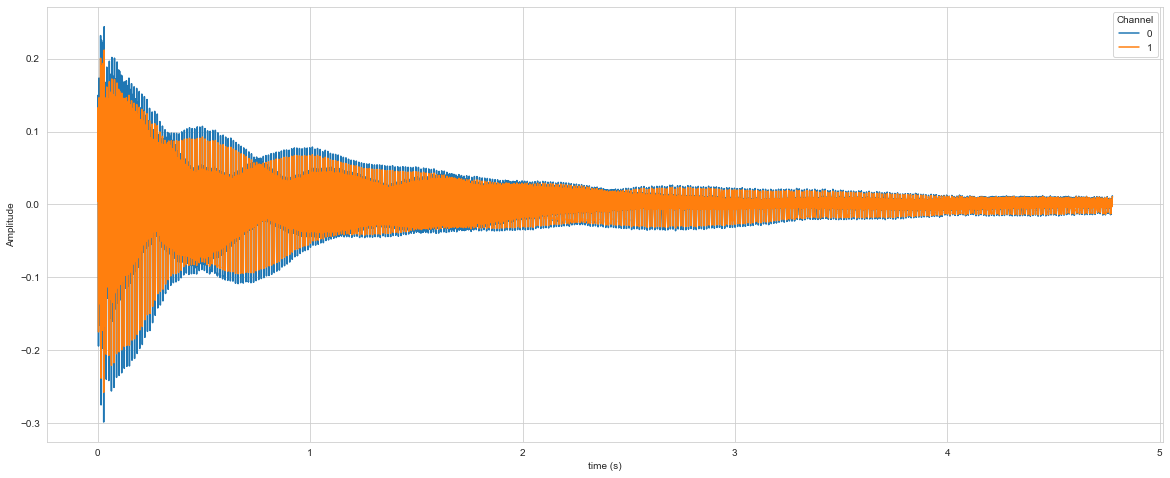

In [10]:
sliced_data = audio_fft.slice_time(a_fft.get_data(), a_fft.samplerate, 0, 10, 10)
trimmed_data = audio_fft.trim_data(sliced_data)

a_fft.set_data(trimmed_data)

fig, ax = plt.subplots(figsize=(20,8))
a_fft.signal_plot(a_fft.get_data(), ax)
plt.show()

By performing a fourier transformation, the most dominant frequencies making up the sound wave can be found. This is done through the `rfft` implementation in `numpy`. 

This gives

maximum_amp 2541.67488575462
maximum_amp 2240.6196825320308
maximum_amp 2541.67488575462
maximum_amp 2240.6196825320308


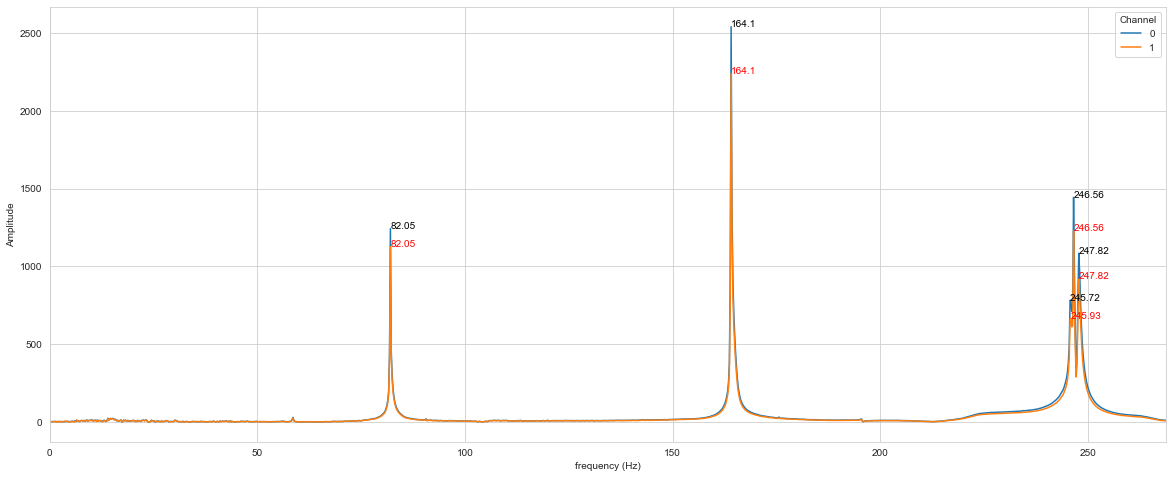

In [11]:
a_fft.set_fdata()
a_fft.set_frequencies()
a_fft.find_dominant_frequencies()
fig, ax = plt.subplots(figsize=(20,8))
a_fft.frequency_plot(a_fft.get_fdata(), ax, pad = 100)
plt.show()

It can be seen that a lagre peak at 164.1 Hz accounts for a large portion of the data. It is possible to take this signal out of the spectrum.

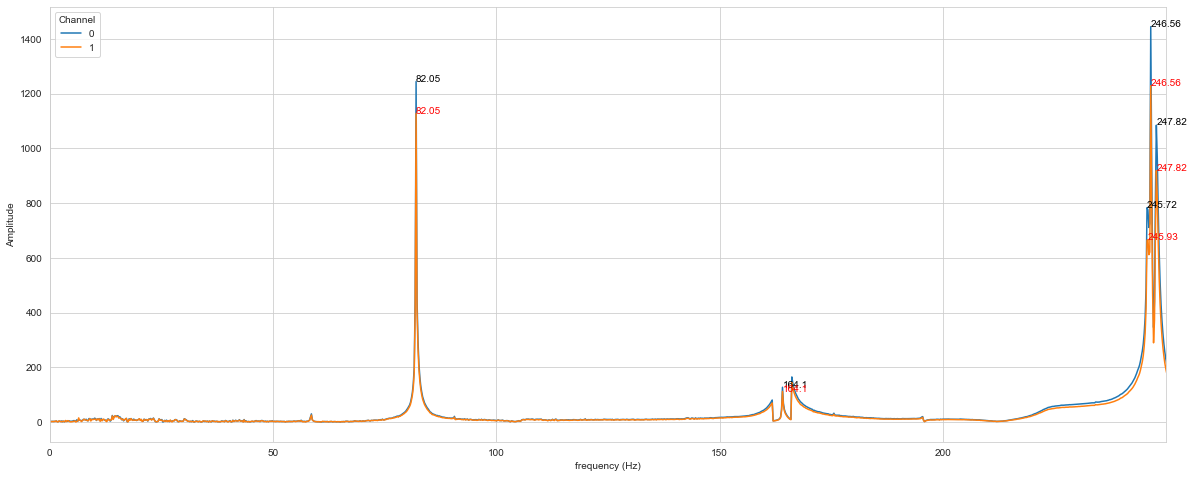

In [12]:
dampened_data = a_fft.dampen_frequencies([164.1], damp=0.95)

fig, ax = plt.subplots(figsize=(20,8))
a_fft.frequency_plot(dampened_data, ax)
plt.show()

From this it is possible to reconstruct a sound signal by applying an inverse fourier transform.

total time 4.777687074829932s


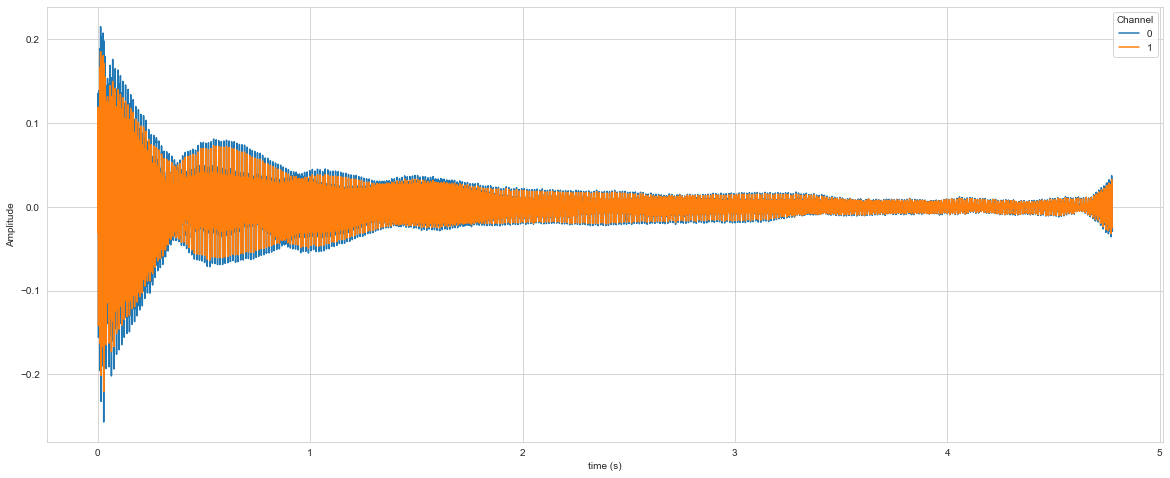

In [13]:
a_fft.set_idata(dampened_data)
fig, ax = plt.subplots(figsize=(20,8))
a_fft.signal_plot(a_fft.get_idata(),ax)
plt.show()

Comparing the two signals side by side gives

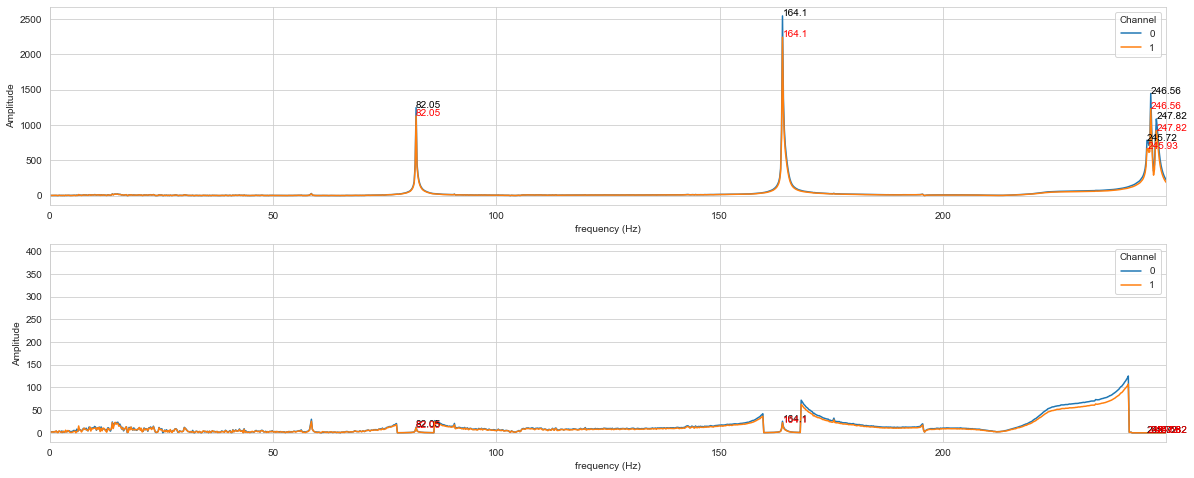

In [34]:
dampened_data = a_fft.dampen_frequencies([82.05, 164.1, 245.93, 246.56, 247.82], damp=0.99, band_size=20)
a_fft.set_idata(dampened_data)

fig, axs = plt.subplots(2,1, figsize=(20,8))
a_fft.frequency_plot(a_fft.get_fdata(), axs[0])
a_fft.frequency_plot(dampened_data, axs[1])
plt.show()


The sound signal plot become:

total time 4.777709750566894s
total time 4.777687074829932s


<AxesSubplot:xlabel='time (s)', ylabel='Amplitude'>

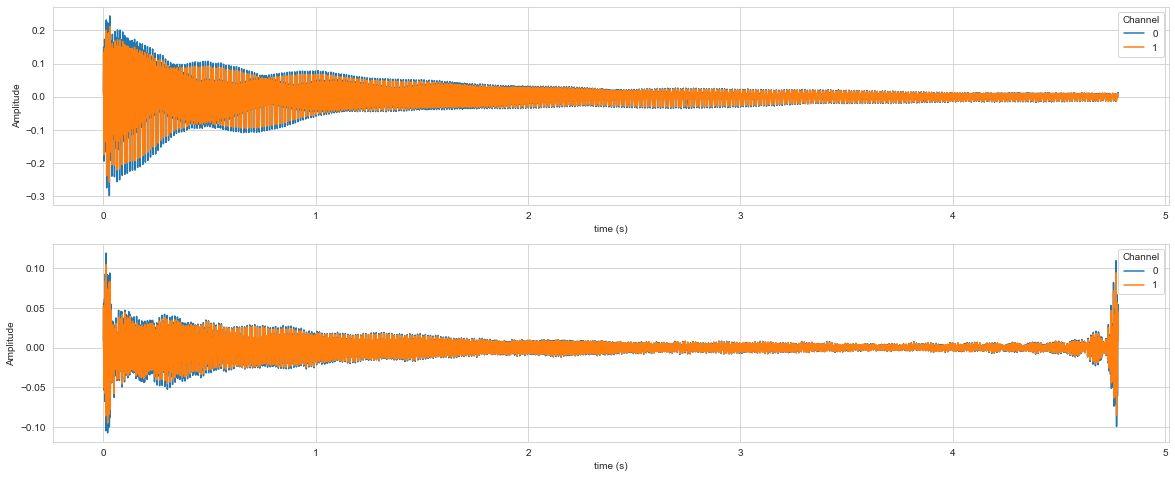

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(20,8))
a_fft.signal_plot(a_fft.get_data(), axs[0])
a_fft.signal_plot(a_fft.get_idata(), axs[1])
plt.show()

Using the sounddevice library it is possible to play these sounds.

In [36]:
import sounddevice as sd
sd.default.samplerate = a_fft.samplerate
sd.play(a_fft.get_data())
sd.wait()

In [43]:
sd.play(a_fft.get_idata())
sd.wait()

It is pssible to compare the two sound signals using the root mean square error metric from `sklearn` or the cosine similarity

In [55]:
from sklearn.metrics import mean_squared_error

print((mean_squared_error(a_fft.get_data()[:-1], a_fft.get_idata()))**0.5)
print(audio_fft.cosine_similarity(a_fft.get_data()[:-1], a_fft.get_idata()))

0.03191090302688384
[0.2971234912261801, 0.30394202044314045]


## Conclusion

Application of the fourier transform on a sound signal is a useful method of extracting frequency information from a sound signal.
From this it is possible to remove any given frequency from the signal and recompose the frequency input. 

Despite removing a frequency it can be difficult to hear the difference between the two signals. To make this more apparent, it may have been adantagious to attemt filtering a constructed sine signal, and not use a recording of a real guitar. 